In [1]:
%cd ../..

/home/eli/AnacondaProjects/combinators


In [2]:
import logging

import numpy as np
import probtorch
import torch

from examples.fep_control import fep_control
from combinators.model import active
from combinators.model import compose, foldable
from combinators.inference import importance
from combinators import utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
target = fep_control.MountainCarAgent(observation_dim=2, state_dim=2, batch_shape=(10,), trainable=False)
proposal = fep_control.RecognitionAgent(state_dim=2, action_dim=1, observation_dim=2, batch_shape=(10,),
                                        discrete_actions=False, name='MountainCarAgent', trainable=True)
agent = importance.propose(target, proposal)

In [5]:
episode = active.ActiveEpisode(agent, 'MountainCarContinuous-v0')

In [6]:
(control, prediction, t), graph, log_weight = episode(render=True)

In [7]:
xi, trained_params, elbos = active.active_variational(episode, 100, lr=1e-3, log_estimator=True, patience=None)

06/25/2019 17:37:30 Episode length: 199
06/25/2019 17:37:31 ELBO=-1.93148901e+03 at epoch 1
06/25/2019 17:37:33 Episode length: 406
06/25/2019 17:37:34 ELBO=-1.73134961e+03 at epoch 2
06/25/2019 17:37:37 Episode length: 618
06/25/2019 17:37:40 ELBO=-1.81874902e+03 at epoch 3
06/25/2019 17:37:41 Episode length: 229
06/25/2019 17:37:42 ELBO=-2.10816431e+03 at epoch 4
06/25/2019 17:37:43 Episode length: 210
06/25/2019 17:37:44 ELBO=-2.02879224e+03 at epoch 5
06/25/2019 17:37:45 Episode length: 333
06/25/2019 17:37:47 ELBO=-1.77473560e+03 at epoch 6
06/25/2019 17:37:50 Episode length: 795
06/25/2019 17:37:53 ELBO=-1.89503943e+03 at epoch 7
06/25/2019 17:37:57 Episode length: 816
06/25/2019 17:38:00 ELBO=-1.77815588e+03 at epoch 8
06/25/2019 17:38:02 Episode length: 327
06/25/2019 17:38:04 ELBO=-1.76797559e+03 at epoch 9
06/25/2019 17:38:07 Episode length: 651
06/25/2019 17:38:09 ELBO=-1.83398096e+03 at epoch 10
06/25/2019 17:38:11 Episode length: 412
06/25/2019 17:38:13 ELBO=-1.79048474e+0

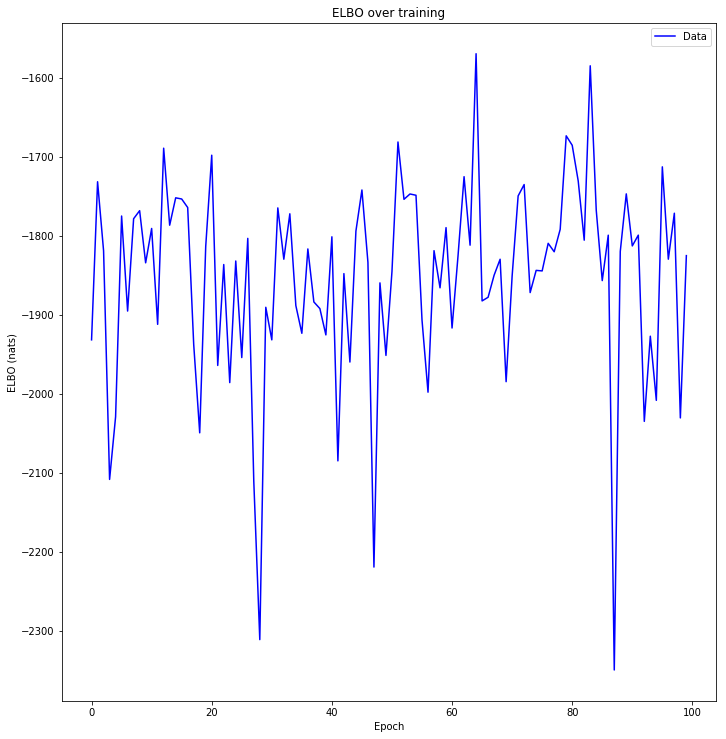

In [8]:
utils.plot_evidence_bounds(-elbos[:, 0].cpu().detach().numpy())

In [9]:
(control, prediction, t), graph, log_weight = episode(render=True)

In [10]:
control

tensor([[1.0408],
        [1.0408],
        [1.0408],
        [1.0408],
        [1.0408],
        [1.0408],
        [1.0408],
        [1.0408],
        [1.0408],
        [1.0408]], grad_fn=<ExpandBackward>)

In [11]:
prediction

{'loc': tensor([[0.1208, 0.2936],
         [0.1221, 0.2721],
         [0.1214, 0.2844],
         [0.1215, 0.2877],
         [0.1205, 0.2994],
         [0.1258, 0.2859],
         [0.1246, 0.2753],
         [0.1241, 0.2843],
         [0.1207, 0.2916],
         [0.1253, 0.2858]], grad_fn=<SelectBackward>),
 'scale': tensor([[0.6710, 0.6813],
         [0.6669, 0.6806],
         [0.6709, 0.6816],
         [0.6708, 0.6811],
         [0.6708, 0.6805],
         [0.6563, 0.6840],
         [0.6628, 0.6823],
         [0.6681, 0.6811],
         [0.6711, 0.6817],
         [0.6673, 0.6810]], grad_fn=<SoftplusBackward>)}

In [12]:
t

435

In [13]:
log_weight

tensor([-833352.5625, -833357.2500, -833372.6250, -833366.5000, -833364.3750,
        -833357.8750, -833364.8125, -833358.6875, -833371.1250, -833367.1875],
       grad_fn=<AddBackward0>)

In [14]:
torch.save(agent, 'examples/fep_control/fep_mountain_car_agent.dat')